In [ ]:
!pip install numpy


In [58]:
import cv2
import numpy as np

# Load your image
image = cv2.imread("IMG_9420.JPG")

# Convert to grayscale (for contour detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding (Optional -  convert to binary)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total = 0
for c in cnts:
    # Check if the contour has points
    if c.size > 0:
        # Convert to float32
        if c.dtype != 'float32':
            c = c.astype('float32')

        # Calculate perimeter and approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # Check if the contour has at least 4 points
        if len(approx) == 4: 
            # Calculate area
            area = cv2.contourArea(approx)
            # Check if the area is greater than 0
            if area > 10:
                cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
                print(f"Contour with {len(approx)} points, Area: {area:.2f}")
                total += 1
            else:
                print(f"Skipping contour with area 0 or less.")
        else:
            print(f"Skipping contour with less than 4 points.")
    else:
        print(f"Skipping empty contour.")

print(f"Total valid contours found: {total}")

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with area 0 or less.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with area 0 or less.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skipping contour with area 0 or less.
Skipping contour with less than 4 points.
Skipping contour with less than 4 points.
Skip

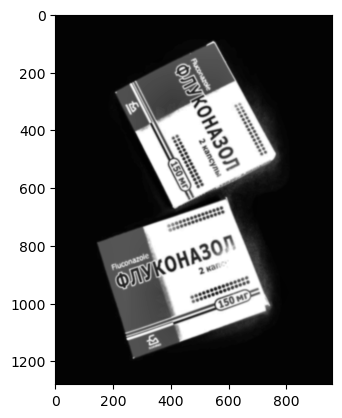

In [136]:
import numpy as np

from matplotlib import pyplot as plt
import cv2
# загружаем изображение, меняем цвет на оттенки серого и уменьшаем резкость
image = cv2.imread("IMG_9420.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6, 6))
contrast_enhanced = clahe.apply(gray) 
cv2.imwrite("gray.jpg", contrast_enhanced)
plt.imshow(contrast_enhanced, cmap='gray')

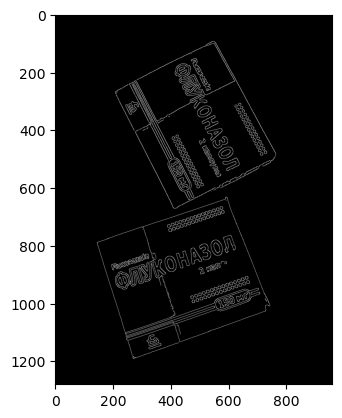

In [138]:
edged = cv2.Canny(contrast_enhanced, 50, 100)
cv2.imwrite("edged.jpg", edged)
plt.imshow(edged, cmap='gray')

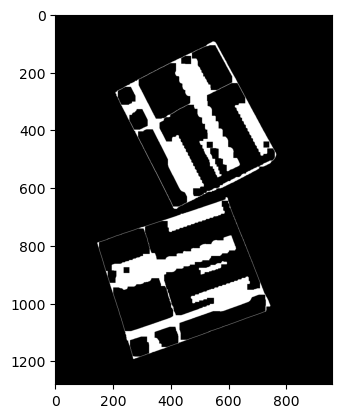

In [139]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("closed.jpg", closed)
plt.imshow(closed, cmap='gray')

In [124]:
# находим контуры в изображении и подсчитываем число книг

total = 0

In [142]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
total = 0
for c in cnts:
    print(f"Contour: {c}")  # Print the contour to inspect its content
    print(f"Contour Data Type: {c.dtype}") # Check contour data type

    # Check if the contour has points
    if c.size > 0:
        
        c = c.reshape((-1, 1, 2)) 
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # Check if the contour has at least 4 points
        if len(approx) >= 4: 
            # Calculate area
            area = cv2.contourArea(approx)
            # Check if the area is greater than 0
            if area > 2:
                cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
                print(f"Contour with {len(approx)} points, Area: {area:.2f}")
                total += 1
            else:
                print(f"Skipping contour with area 0 or less.")
        else:
            print(f"Skipping contour with less than 4 points.")
    else:
        print(f"Skipping empty contour.")

print(f"Total valid contours found: {total}")

Contour: [[ 1 -1 -1 -1]
 [-1  0 -1 -1]]
Contour Data Type: int32
Skipping contour with area 0 or less.
Total valid contours found: 0


In [157]:
import cv2
import numpy as np

my_photo = cv2.imread("IMG_9420.JPG")
filterd_image  = cv2.medianBlur(my_photo,7)
img_grey = cv2.cvtColor(filterd_image,cv2.COLOR_BGR2GRAY)

#set a thresh
thresh = 50

#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.uint8(np.zeros((my_photo.shape[0],my_photo.shape[1])))

cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2.imshow('origin', my_photo) # выводим итоговое изображение в окно
cv2.imshow('res', img_contours) # выводим итоговое изображение в окно

cv2.waitKey()
cv2.destroyAllWindows()

In [158]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(type(contours),type(hierarchy))

<class 'tuple'> <class 'numpy.ndarray'>


In [159]:
img_contours = np.uint8(np.zeros((my_photo.shape[0],my_photo.shape[1])))

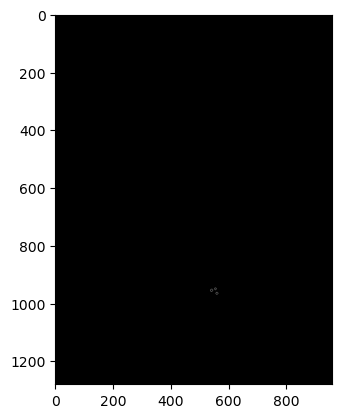

In [160]:
sel_countours=[]
sel_countours.append(contours[3])
sel_countours.append(contours[7])
sel_countours.append(contours[8])
cv2.drawContours(img_contours, sel_countours, -1, (255,255,255), 1)
plt.imshow(img_contours, cmap='gray')

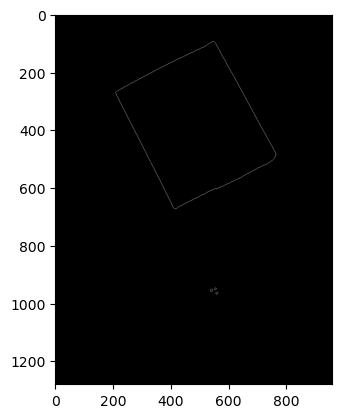

In [161]:
max=0
sel_countour=None
for countour in contours:
    if countour.shape[0]>max:
        sel_countour=countour
        max=countour.shape[0]

cv2.drawContours(img_contours, [sel_countour], -1, (255,255,255), 1)
plt.imshow(img_contours, cmap='gray')

In [162]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [163]:
for point in sel_countour:
    y=int(point[0][1])
    x=int(point[0][0])
    img_contours[y,x]=255

In [164]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


In [165]:
last_point=None
for point in sel_countour:
    curr_point=point[0]
    if not(last_point is None):
        x1=int(last_point[0])
        y1=int(last_point[1])
        x2=int(curr_point[0])
        y2=int(curr_point[1])
        cv2.line(img_contours, (x1, y1), (x2, y2), 255, thickness=1)
    last_point=curr_point

Contour 1: Area = 208729.5, Vertices = 1
Contour 2: Area = 92811.5, Vertices = 1
Contour 3: Area = 68931.5, Vertices = 1


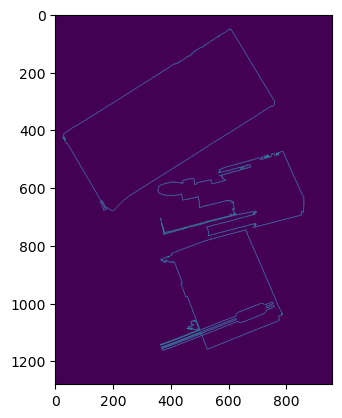

In [244]:
import cv2
import numpy as np
import os

img = cv2.imread("images/views/IMG_94242.JPG")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 140

# Get threshold image
ret, thresh_img = cv2.threshold(gray, thresh, 150, cv2.THRESH_BINARY)

# Find contours without approx
contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Sort contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the top 3 contours
top_contours = contours[:3]

# Create a canvas to draw on
canvas = img.copy()

# Draw contours and circles around vertices
for i, contour in enumerate(top_contours):
    # Calculate arc length
    arclen = cv2.arcLength(contour, True)

    # Approximate the contour
    eps = 50
    epsilon = arclen * eps
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Draw the contour
    cv2.drawContours(canvas, [approx], -1, (0, 0, 255), 2, cv2.LINE_AA)

    # Draw circles around vertices
    for pt in approx:
        cv2.circle(canvas, (pt[0][0], pt[0][1]), 7, (0, 255, 0), -1)

    # Print contour information
    print(f"Contour {i + 1}: Area = {cv2.contourArea(contour)}, Vertices = {len(approx)}")

# Create a separate image for contours
img_contours = np.uint8(np.zeros((img.shape[0], img.shape[1])))
for contour in top_contours:
    cv2.drawContours(img_contours, [contour], -1, (255, 255, 255), 1)

# Show the results
plt.imshow( canvas)
plt.imshow(img_contours)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


path = "images/views/IMG_9023.jpeg"
filename = "images/database/4810201015620/4810201015620_keypoints.txt"

image = (cv2.imread(path))
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Загрузка данных из файла
def process_line(parts, keypoints_dict, filename):
    """Обрабатывает строку из файла ключевых точек и добавляет данные в словарь.

    Args:
        parts: Список слов, полученный из разделения строки файла.
        keypoints_dict: Словарь, хранящий данные по изображениям.
        filename: Имя файла, из которого получена строка.
    """

    if len(parts) < 5:
        # Если строка содержит информацию о размере изображения
        keypoints_dict[filename]['shape'] = [int(parts[1]), int(parts[2])]
    else:
        # Если строка содержит информацию о ключевой точке
        x, y, size, angle, octave, response = map(float, parts[1:7])
        desc = np.array(list(map(float, parts[7:])))
        keypoints_dict[filename]['keypoints'].append(
            cv2.KeyPoint(x, y, size, angle, octave=int(octave), response=response)
        )
        keypoints_dict[filename]['descriptors'].append(desc)

def load_keypoints_and_descriptors(filename):
    """Загружает ключевые точки и дескрипторы из файла.

    Args:
        filename: Путь к файлу с ключевыми точками.

    Returns:
        Словарь, содержащий данные по изображениям (ключевые точки, дескрипторы, размеры).
    """
    keypoints_dict = {}
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            filename = parts[0]
            if filename not in keypoints_dict:
                keypoints_dict[filename] = {'keypoints': [], 'descriptors': [], 'shape': []}
            process_line(parts, keypoints_dict, filename)

    # Преобразование дескрипторов в NumPy массивы
    for key in keypoints_dict:
        arr = np.zeros((len(keypoints_dict[key]['descriptors']), 128))
        for i, line in enumerate(keypoints_dict[key]['descriptors']):
            for j, n in enumerate(line):
                arr[i][j] = n
        keypoints_dict[key]['descriptors'] = arr

    return keypoints_dict

def find_matches(keypoints_by_image, descriptors):
    """Находит соответствия ключевых точек между изображениями."""
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=21)
    search_params = dict(checks=300)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
  # Словарь для хранения совпадений по файлам
    Matches_kp = {}  # Словарь для хранения ключевых точек из файлов
    kp = {}  # Словарь для хранения ключевых точек из текущего изображения
    for filename, data in keypoints_by_image.items():
        train_descriptors = data['descriptors'].astype(np.float32)
        match = flann.knnMatch(train_descriptors, descriptors, k=2)  # Создаем пустой список для совпадений этого файла
        Matches_kp[filename] = []  # Создаем пустой список для ключевых точек этого файла
        kp[filename] = []  # Создаем пустой список для ключевых точек текущего изображения (для этого файла)
        for m, n in match:
            if m.distance < 0.6 * n.distance:  # Добавляем совпадения в список для этого файла
                Matches_kp[filename].append(data['keypoints'][m.queryIdx])  # Добавляем ключевые точки из файла
                kp[filename].append(keypoints[n.trainIdx])  # Добавляем ключевые точки из текущего изображения
    return Matches_kp, kp

In [3]:

def draw_keypoints(image, Matches_kp, kp, img2):
    """Рисует ключевые точки на изображении."""
    flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_DEFAULT
    img2 = cv2.drawKeypoints(image, Matches_kp, img2, color=(255, 0, 255), flags=flags)
    img2 = cv2.drawKeypoints(image, kp, img2, color=(255, 255, 0), flags=flags)
    return img2

keypoints_by_image = load_keypoints_and_descriptors(filename)
Matches_kp = {}
kp = {}
shapes = [[filename,keypoints_by_image[filename]['shape']]for filename in keypoints_by_image.keys()]
# Вызов функции find_matches
Matches_kp, kp = find_matches(keypoints_by_image, descriptors)
del keypoints_by_image,descriptors,keypoints

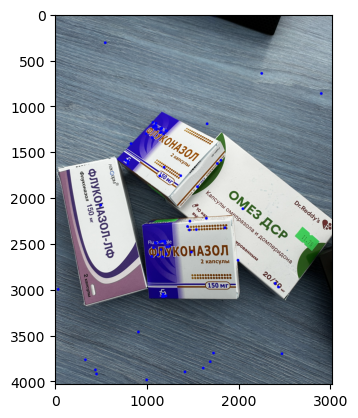

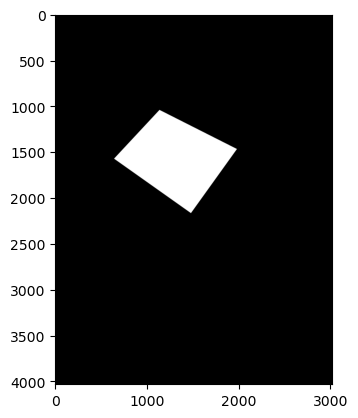

255


KeyboardInterrupt: 

In [8]:
from scipy.spatial.distance import cdist
def find_homography_and_filter_matches(image, Matches_kp, kp, keypoints_dict):
    """Находит гомографию и фильтрует совпадения, не попадающие в прямоугольник."""
    i=0
    mask = np.zeros_like(image, dtype=np.uint8)  # Initialize the mask outside the loop
    for filename in Matches_kp:
        
        mask_coords = np.where((mask != (0, 0, 0)).all(axis=2))
        mask_coords = list(zip(mask_coords[1], mask_coords[0])) # (x, y)
        kp[filename] = [keypoint for i, keypoint in enumerate(kp[filename]) if (int(keypoint.pt[0]), int(keypoint.pt[1])) not in mask_coords]
        
            # Сохраняем индексы удаленных точек
        removed_indices=([i for i, keypoint in enumerate(kp[filename]) if (int(keypoint.pt[0]), int(keypoint.pt[1])) in mask_coords])

            # Фильтруем Matches_kp, удаляя точки с теми же индексами, что и в kp:
        Matches_kp[filename] = [keypoint for i, keypoint in enumerate(Matches_kp[filename]) if i not in removed_indices]
        while len(Matches_kp[filename]) > 30:
            if len(Matches_kp[filename]) != len(kp[filename]):
                print(f"Ошибка: количество точек в Matches_kp и kp не совпадает для файла {filename}.")
                break
            src_pts = np.float32([m.pt for m in Matches_kp[filename]]).reshape(-1, 1, 2)
            dst_pts = np.float32([m.pt for m in kp[filename]]).reshape(-1, 1, 2)
            if src_pts.shape != dst_pts.shape:
                print(f"Ошибка: src_pts и dst_pts должны иметь одинаковую форму для файла {filename}.")
                break
            img = image.copy()
            for pt in dst_pts:
                cv2.circle(img, (int(pt[0][0]), int(pt[0][1])), 15, (0, 0, 255), -1)  # Red circles for Matches_kp
            plt.imshow(img)
            plt.show()
            # Calculate homography
            M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.2)
            # Get image dimensions from keypoints_dict
            h, w = keypoints_dict[i][1][0], keypoints_dict[i][1][1]
            # Create a rectangle with the image dimensions
            rect_pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
            # Transform the rectangle using the found homography
            transformed_rect = cv2.perspectiveTransform(rect_pts, M)
            # Draw the rectangle on the image
            img2 = cv2.polylines(image.copy(), [np.int32(transformed_rect)], True, 150, 20, cv2.LINE_AA)

            # Update the mask with the new rectangle
            cv2.fillPoly(mask, [np.int32(transformed_rect)], (255, 255, 255))
            plt.imshow(mask)
            plt.show()
            print(mask.max())
            mask_coords = np.where((mask == (255, 255, 255)).all(axis=2))
            mask_coords = list(zip(mask_coords[1], mask_coords[0])) # (x, y)
            kp[filename] = [keypoint for i, keypoint in enumerate(kp[filename]) if (int(keypoint.pt[0]), int(keypoint.pt[1])) not in mask_coords]
        
            # Сохраняем индексы удаленных точек
            removed_indices=[i for i, keypoint in enumerate(kp[filename]) if (int(keypoint.pt[0])) in mask_coords]

            # Фильтруем Matches_kp, удаляя точки с теми же индексами, что и в kp:
            Matches_kp[filename] = [keypoint for i, keypoint in enumerate(Matches_kp[filename]) if i not in removed_indices]
            plt.imshow(img2)
            plt.show()
        i+=1

find_homography_and_filter_matches(image, Matches_kp.copy(), kp.copy(), shapes)